## Reverse keras deep learning model

- it can be useful to reverse ingeneering a model
  
- to convert newtork from api sequential network to api functional model style      



In [1]:
from keras import layers
from keras.models import Model, Sequential
from keras.layers import Concatenate, Input, Dense
from keras.utils.vis_utils import plot_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda33\lib\site-packages\tensorflow\python\framework\dtype

### Reverse ingenerring deep learning model to a source

In [2]:

def reverse_model(model, api_functional):
    """ reverse ingeneering model keras """
    """ can be used to convert from Sequential <-> Functional model 
    input:
        model : existing model you want the source 
        api_fontional : True for functional, False for Sequential modeling
    output:
        new model: 
        source
    """    
    cfg = model.get_config()
    lst_couches = cfg['layers']
    visible = None
    hidden = None
    input_shape = []
    src = []
    new_model = Model()        
    if not api_functional:
        new_model = Sequential()
        src.append("model = Sequential()")
        
    for x in lst_couches:
        c = x['class_name']
        units = 0
        activation = ''
        if 'units' in x['config']:
            units = x['config']['units']
        if 'activation'in x['config']:            
            activation = x['config']['activation']
        if 'batch_input_shape' in x['config'].keys():
            batch_input_shape = x['config']['batch_input_shape']
            for s in batch_input_shape:
                if not s is None:
                    input_shape.append(s)
            input_shape = tuple(input_shape)        
            if api_functional and visible is None:
                visible = layers.Input(shape=input_shape)
                src.append("visible = layers.Input(shape="+str(input_shape)+")")
            #print(c, units, activation, input_shape)
        #else:
        #    print(c, units, activation)
        if c == 'Dense':
            if hidden is None: 
                if api_functional: 
                    hidden = layers.Dense(units, activation=activation)(visible)
                    src.append("hidden = layers.Dense("+str(units)+", activation='"+str(activation)+"')(visible)")
                else:
                    hidden = True
                    new_model.add(Dense(units, activation=activation, input_shape=input_shape))
                    src.append("model.add(Dense("+str(units)+", activation='"+str(activation)+"', input_shape="+str(input_shape)+")")
            else:
                if api_functional: 
                    hidden = layers.Dense(units, activation=activation)(hidden)
                    src.append("hidden = layers.Dense("+str(units)+", activation='"+str(activation)+"')(hidden)")
                else:
                    new_model.add(Dense(units, activation=activation))
                    src.append("model.add(Dense("+str(units)+", activation='"+str(activation)+"')")
                    
    #if c == 'InputLayer':        
    if api_functional:                 
        new_model = Model(inputs=visible, outputs=hidden)        
        src.append("model = Model(inputs=visible, outputs=hidden)")        
    print(new_model.summary())
    mod = "Sequential"
    if api_functional:
        mod = "Functional"
    mod += " model:"    
    src = [mod] + src    
    print("\n".join(src))
    return new_model


#### create a sequential model

In [3]:

def create_seq_model():
    """ create a sequential model """
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(10,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    return model

model = create_seq_model()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


#### Reverse ingeneering to produce an api functional model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Functional model:
visible = layers.Input(shape=(10,))
hidden = layers.Dense(10, activation='relu')(visible)
hidden = layers.Dense(20, activ

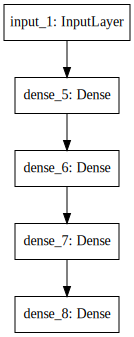

In [4]:
model_f = reverse_model(model, api_functional=True)
SVG(model_to_dot(model_f).create(prog='dot', format='svg'))

#### Reverse ingeneering to produce an api sequential model

In [5]:
reverse_model(model, api_functional=False)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Sequential model:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,))
model.add(Dense(20, activation='relu')
model.add(Dense(10, activation='relu')
model.add(Dense(1, activation='sigmoid')


#### Reverse ingeneering to produce a sequential model, from a functional model style

In [6]:
reverse_model(model_f, api_functional=False)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 11        
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________
None
Sequential model:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,))
model.add(Dense(20, activation='relu')
model.add(Dense(10, activation='relu')
model.add(Dense(1, activation='sigmoid')


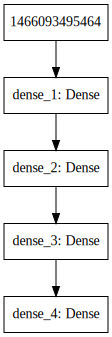

In [7]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))